## The following CNN trains data on the famous MNIST dataset for handwritten_Digit_Recognition
Each image is of size 28 x 28
60,000 training example + 10,000 test example

## Looking at the data

In [1]:
# loading the MNIST data set in Keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test,y_test) = mnist.load_data()

#plot 4 of the many images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray')) 
plt.subplot(223)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray')) 
plt.subplot(224)
plt.imshow(X_train[15], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils # one hot encoding

In [38]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

np.random.seed(7)

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# input normalization
X_train = X_train / 255
X_test = X_test / 255

# one hot encode the output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Network model, fully connected

In [39]:
def base_model():
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='normal', activation='softmax'))
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model;

In [35]:
# build the model
model = base_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2784 - acc: 0.9209 - val_loss: 0.1411 - val_acc: 0.9572
Epoch 2/10
 - 6s - loss: 0.1119 - acc: 0.9676 - val_loss: 0.0919 - val_acc: 0.9703
Epoch 3/10
 - 6s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0787 - val_acc: 0.9771
Epoch 4/10
 - 7s - loss: 0.0507 - acc: 0.9855 - val_loss: 0.0743 - val_acc: 0.9768
Epoch 5/10
 - 7s - loss: 0.0374 - acc: 0.9892 - val_loss: 0.0668 - val_acc: 0.9794
Epoch 6/10
 - 6s - loss: 0.0271 - acc: 0.9927 - val_loss: 0.0632 - val_acc: 0.9806
Epoch 7/10
 - 7s - loss: 0.0209 - acc: 0.9948 - val_loss: 0.0626 - val_acc: 0.9809
Epoch 8/10
 - 6s - loss: 0.0142 - acc: 0.9970 - val_loss: 0.0620 - val_acc: 0.9799
Epoch 9/10
 - 7s - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0588 - val_acc: 0.9807
Epoch 10/10
 - 7s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0585 - val_acc: 0.9816
Baseline Error: 1.84%


## ConvNet Model

In [3]:
# add additional libraries
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
# Sets the value of the image dimension ordering convention to theano
K.set_image_dim_ordering('th')

Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [channels][width][height]. In the case of RGB, the first dimension channels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the channels values are gray scale, the pixel dimension is set to 1.

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [48]:
def base_model():
    model = Sequential()
    model.add(Conv2D(32,(5,5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
# build the model
model = base_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 137s - loss: 0.2324 - acc: 0.9340 - val_loss: 0.0813 - val_acc: 0.9744
Epoch 2/10
 - 133s - loss: 0.0736 - acc: 0.9783 - val_loss: 0.0463 - val_acc: 0.9843
Epoch 3/10
 - 135s - loss: 0.0530 - acc: 0.9839 - val_loss: 0.0425 - val_acc: 0.9857
Epoch 4/10
 - 133s - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0408 - val_acc: 0.9872
Epoch 5/10
 - 133s - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0354 - val_acc: 0.9876
Epoch 6/10
 - 133s - loss: 0.0275 - acc: 0.9914 - val_loss: 0.0316 - val_acc: 0.9888
Epoch 7/10
 - 133s - loss: 0.0232 - acc: 0.9926 - val_loss: 0.0354 - val_acc: 0.9881
Epoch 8/10
 - 133s - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0314 - val_acc: 0.9890
Epoch 9/10
 - 133s - loss: 0.0167 - acc: 0.9946 - val_loss: 0.0299 - val_acc: 0.9901
Epoch 10/10
 - 139s - loss: 0.0146 - acc: 0.9957 - val_loss: 0.0311 - val_acc: 0.9901
CNN Error: 0.99%


## Larger Convolutional Neural Network for MNIST
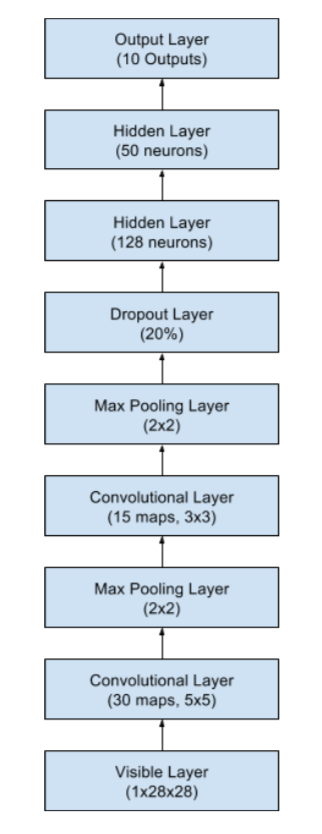

In [7]:
def larger_model():
  # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [8]:
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.3893 - acc: 0.8786 - val_loss: 0.0867 - val_acc: 0.9731
Epoch 2/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0984 - acc: 0.9697 - val_loss: 0.0556 - val_acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0729 - acc: 0.9777 - val_loss: 0.0377 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0567 - acc: 0.9821 - val_loss: 0.0329 - val_acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0483 - acc: 0.9849 - val_loss: 0.0288 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0456 - acc: 0.9858 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0386 - acc: 0.9879 - val_loss: 0.0312 - 